In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

#reading from Database uding pandas    
df_train = pd.read_csv ('data_train.csv')
df_test = pd.read_csv ('data_test.csv')

train = df_train.values
X_train = train[:,0:16]
y_train = train[:,16:17]

test = df_test.values
X_test = test[:,0:16]
y_test = test[:,16:17]



# Part A
## random forest implementation without prepared library 

In [10]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
import random 

dtree = DecisionTreeClassifier(max_depth=3)
choices = list(range(16)) 
k=0
models = []
outcomes = []
print('Accuracy of decision trees built:\n')

while k<15:
    
    '''Bootstrap sampling'''
    X_train_sample=[]
    y_train_sample=[]
    for i in range(len(y_train)):
        n=random.randrange(len(y_train))
        X_train_sample.append(X_train[n])
        y_train_sample.append(y_train[n])
    
    X_train_sample = np.array(X_train_sample)
    y_train_sample = np.array(y_train_sample)
    
    '''random feature selection'''
    random.shuffle(choices)
    X_train_random_feature = np.array([X_train_sample[:,choices[0]] , X_train_sample[:,choices[1]] , X_train_sample[:,choices[2]] ]).T
    X_test_random_feature = np.array([X_test[:,choices[0]] , X_test[:,choices[1]] , X_test[:,choices[2]]  ]).T
    
    model = dtree.fit(X_train_random_feature,y_train_sample)
    models.append(model)
    predicted = model.predict(X_test_random_feature)
    
    
    if (dtree.score(X_test_random_feature , y_test)) > .5:
        k=k+1
        print(dtree.score(X_test_random_feature , y_test))
        outcomes.append(predicted)
    
cmdtree = confusion_matrix(y_test,predicted) 
#print(cmdtree)
#print(dtree.score(X_test , y_test))


Accuracy of decision trees built:

0.5393194166428367
0.5161567057477838
0.5095796396911638
0.540177294824135
0.5376036602802402
0.5541893051186731
0.5121532742350586
0.5072919645410352
0.5476122390620531
0.5616242493565914
0.5124392336288247
0.5341721475550472
0.5218758936231055
0.5155847869602517
0.523305690591936


In [8]:
import scipy
from sklearn.metrics import accuracy_score
results = []
for i in range(len(outcomes[0])):
    expr = []
    for n in range(15):
        expr.append(outcomes[n][i])
    results.append(scipy.stats.mode(expr)[0])
    
print('Random Forest Accuracy: ' +  str(accuracy_score(results,y_test)) +'\n'   )
print('Confusion Matrix:\n\n'+ str(confusion_matrix(results,y_test) ))

Random Forest Accuracy: 0.6954532456391193

Confusion Matrix:

[[338   0   0   0   0   0   6   1  70   0]
 [  1 106   0   1   0   0   0  13   0   6]
 [  5 215 355   0   2   0  14  11   0   0]
 [  1  42   6 335  11 166   7  44   0 316]
 [  0   1   0   0 351   0   2   2   0  13]
 [  0   0   0   0   0 160   0   0  34   0]
 [  2   0   0   0   0   1 294   1   3   0]
 [  3   0   3   0   0   0  13 283  18   0]
 [ 13   0   0   0   0   8   0   9 210   1]
 [  0   0   0   0   0   0   0   0   0   0]]


# Part A
## random forest implementation with prepared library 

In [26]:
'''Solve using prepared library'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = RandomForestClassifier(max_depth=3, random_state=1,n_estimators=15)
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Random Forest Accuracy(prepared library): ' +  str(accuracy) +'\n'   )
print('Confusion Matrix(prepared library):\n\n'+ str(confusion_matrix(y_pred,y_test) ))



Random Forest Accuracy(prepared library): 0.79182156133829

Confusion Matrix(prepared library):

[[311   0   0   0   0   0   4   0  15   0]
 [  0 199   5   2   1   0   1  30   0  36]
 [  0 161 353   0   0   0   3  15   0   0]
 [  0   3   0 325   5 119   5   1   0  29]
 [  1   1   0   2 354  25   2   0   0  27]
 [  0   0   0   0   0 166   0   4  16   0]
 [  2   0   0   0   0   0 292   7   7   0]
 [ 19   0   6   7   0   1  27 285  54   2]
 [ 30   0   0   0   0   2   2   3 243   1]
 [  0   0   0   0   4  22   0  19   0 241]]


# Part B 

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('AdaBoost Accuracy(n_estimators=10): ' +  str(accuracy) +'\n'   )


AdaBoost Accuracy(n_estimators=10): 0.5487560766371176



# Part C

AdaBoost Accuracy(n_estimators=5): 0.523305690591936
AdaBoost Accuracy(n_estimators=10): 0.5487560766371176
AdaBoost Accuracy(n_estimators=20): 0.6371175293108379
AdaBoost Accuracy(n_estimators=50): 0.610523305690592


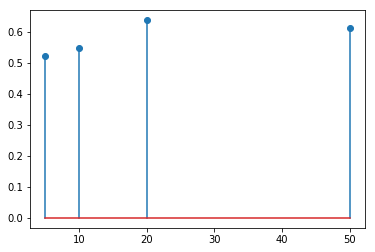

In [30]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
n_estimators = [5 ,10,20,50]
accuracy_result=[]
for n in n_estimators:
    clf = AdaBoostClassifier(n_estimators=n)
    clf.fit(X_train, y_train.ravel())
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print('AdaBoost Accuracy(n_estimators={}): '.format(n) +  str(accuracy)    )
    accuracy_result.append(accuracy)
plt.stem(n_estimators,accuracy_result)
plt.show()


# Part D

In [68]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
'''In order to maximize the accuracy of the training data, the model parameters were selected as follows'''
model = XGBClassifier(booster ='gbtree',eta =.3,max_depth=4,min_child_weight=1,gamma = .03,subsample=.5,colsample_bytree=.5)
model.fit(X_train,y_train.ravel())
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of Gradient Boosting(XGBoost): ' +  str(accuracy) +'\n'   )

Accuracy of Gradient Boosting(XGBoost): 0.9373748927652273

